# CHURN PREDICTION
### By Moh. Ridwan

In [ ]:
# mounted google drive
import google.colab as gc
gc.drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# check the path
!pwd

/content


In [ ]:
# change folder
%cd '/content/drive/My Drive/LATIHAN/Final Project'

/content/drive/My Drive/LATIHAN/Final Project


In [ ]:
# check file in folder
!ls

'credit scoring train.csv'    telecom_users.csv     Video_Games_Sales.csv
 credit_scoring_train.ipynb   telecom_users.ipynb   Video_Games_Sales.ipynb


# Understand Business Problem and Objective

### Introduction

Any business wants to maximize the number of customers. To achieve this goal, it is important not only to try to attract new ones, but also to retain existing ones. 
Accordingly, predicting the churn, we can react in time and try to keep the client who wants to leave. Based on the data about the services that the client uses, we can make him a special offer, trying to change his decision to leave the operator. This will make the task of retention easier to implement than the task of attracting new users, about which we do not know anything yet.
You are provided with a dataset from a telecommunications company. The data contains information about almost six thousand users, their demographic characteristics, the services they use, the duration of using the operator's services, the method of payment, and the amount of payment.



### Problem

There have been several customers who have left the company over the past month. The company may run out of customers in the coming months if no action is taken. Based on that, there are challenges that need to be solved.

1. How to predict churn to retain consumers who want to leave
2. How to classify consumers who are predicted to move to provide different solutions

### Objective

The task is:
1. To analyze the data and predict the churn of users (to identify people who will and will not renew their contract)
2. To find out how to classify consumers who are predicted to move to provide different solutions

# Importing The Data

In [ ]:
import pandas as pd

data = pd.read_csv('telecom_users.csv')
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


# Data Understanding

In [ ]:
# shape of data
data.shape

(5986, 22)

In [ ]:
# columns/fitures name in data
data.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [ ]:
# searching for missings,type of data and also known the shape of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [ ]:
# number of unique values for each column
data.nunique().sort_values()

Churn                  2
PaperlessBilling       2
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PhoneService           2
Contract               3
StreamingMovies        3
StreamingTV            3
TechSupport            3
DeviceProtection       3
OnlineSecurity         3
InternetService        3
MultipleLines          3
OnlineBackup           3
PaymentMethod          4
tenure                73
MonthlyCharges      1526
TotalCharges        5611
customerID          5986
Unnamed: 0          5986
dtype: int64

# EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### Plot Each Feature

##### Plot Curn Column

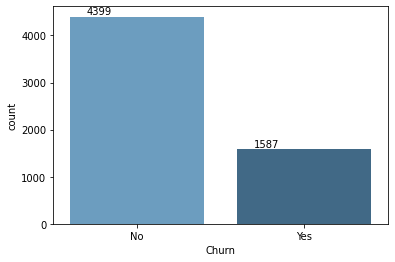

In [ ]:
ax= sns.countplot(x='Churn', data=data, palette="Blues_d")

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [ ]:
print((1587/5986)*100,'%')

26.511861009021047 %


##### Plot Insight:

There is a data imbalance between churners and non-churners. On the data, non-churners far more churners. So that before making a model it is necessary to address the problem of data imbalance first.
The data set contains informations about Telco customers where each row represents a unique customers and the columns are informations regarding customers’services.
The column “Churn” indicate whether the customer left the company within the last month.
There are a total of 5986 customers in the dataset among which 1587 left within the last month.
With a churn rate that high, i.e 26.51%, Telco may run out of customers in the coming months if no action is taken.

##### Plot Some Features

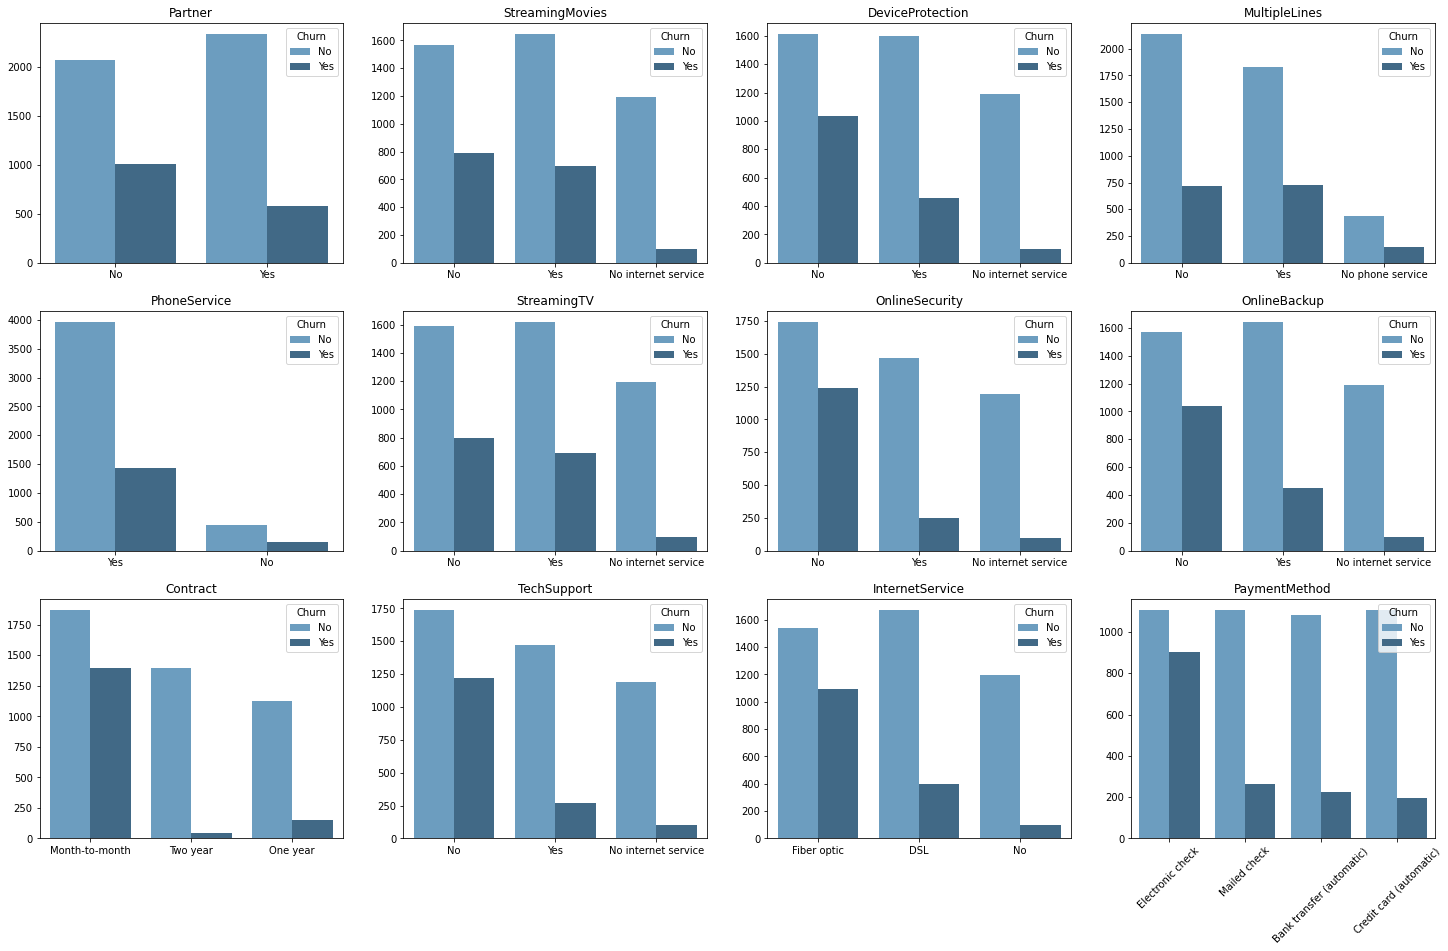

In [ ]:
# Plot Features

def plot_chart(cols,fz=(25,15), rot=0):
    fig, axes = plt.subplots(nrows=3, ncols=(len(cols)+1)//3, figsize=fz)
    for i, col in enumerate(cols):
        sns.countplot(x=col, data=data, hue='Churn', ax=axes[i%3,i//3], order=data[col].value_counts().index, palette="Blues_d")
        axes[i%3,i//3].set_title(col)
        axes[i%3,i//3].set_xlabel(None)
        axes[i%3,i//3].set_ylabel(None)
        xlabels = axes[i%3,i//3].get_xticklabels()
        if col == 'PaymentMethod':
          axes[i%3,i//3].set_xticklabels(xlabels, rotation=45)
        else:
          axes[i%3,i//3].set_xticklabels(xlabels, rotation=rot)
 
    for i in range(len(cols), len(axes.flatten()) ):
        fig.delaxes(axes.flatten()[i])

# Plot the first type - accept only Yes/No
plot_chart(['Partner', 'PhoneService', 'Contract','StreamingMovies', 'StreamingTV', 
            'TechSupport', 'DeviceProtection', 'OnlineSecurity', 'InternetService', 
            'MultipleLines', 'OnlineBackup', 'PaymentMethod'])

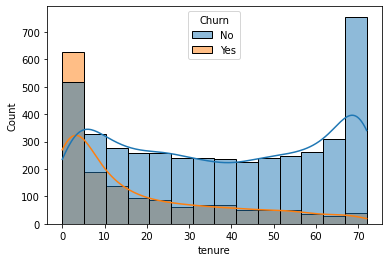

In [ ]:
sns.histplot(data=data, hue='Churn', x="tenure", kde=True)

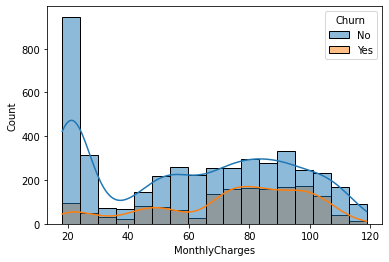

In [ ]:
sns.histplot(data=data, hue='Churn', x="MonthlyCharges", kde=True)

##### Plot Insight:

###### 1. Paperless Billing
The churn rate of the client uses paperless billing is higher than the churn rate of the client use paper billing.
###### 2. Gender
The churn rate of male is higher than the churn rate of female.
###### 3. Senior Citizen
The churn rate of senior citizens is higher than the churn rate of non-seniors.
###### 4. Partner
The churn rate of customers without partners is higher than the churn rate of customers with partners.
###### 5. Dependents
The churn rate of the customer has not dependents is higher than the churn rate of customer has dependents.
###### 6. Phone Service
The churn rate for phone service connected is higher than no phone service connected.
###### 7. Contract
The churn rate for month-to-month contracts is higher than for other contract terms.
###### 8. Streaming Movies
The churn rate for the streaming cinema service not activated is higher than for other streaming cinema service terms.
###### 9. Streaming TV
The churn rate for the streaming TV service not activated is higher than for other streaming TV service terms.
###### 10. Tech Support
The churn rate for  the technical support service not connected is higher than for other technical support service terms.
###### 11. Device Protection
The churn rate for  the client have not equipment insurance is higher than for other.
###### 12. Online Security
The churn rate for  the online security service not connected is higher than for other online security service terms.
###### 13. Internet Service
Customers with InternetService fiber optic as part of their contract have much higher churn rate.
###### 14. Multiple Lines
The churn rate for  multiple phone lines not connected is higher than for other  terms.
###### 15. Online Backup
The churn rate for online backup service not activated is higher than for other online backup service terms.
###### 16. Payment Method
Payment method electronic check shows much higher churn rate than other payment methods.
###### 17. Tenure
someone who has been a client of the company for less than 5 months has the potential to become an unfaithful customer.
###### 18. Monthly Charges
Disloyal customers tend to pay the more important fees, which are between 65 and 105 dollar. Loyal customers tend to pay more important fees ranging from less than 30

# Data Preparation

In [ ]:
# check the number of missing values
data.isnull().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# check frequency from unique data
for i in data.columns:
  print(i)
  print(data[i].value_counts())
  print('-'*10)

Unnamed: 0
2047    1
4687    1
581     1
6726    1
4679    1
       ..
1258    1
3307    1
5356    1
1262    1
0       1
Name: Unnamed: 0, Length: 5986, dtype: int64
----------
customerID
2034-CGRHZ    1
7660-HDPJV    1
1853-ARAAQ    1
8541-QVFKM    1
7869-ZYDST    1
             ..
1043-YCUTE    1
2876-VBBBL    1
8985-OOPOS    1
3173-NVMPX    1
8213-TAZPM    1
Name: customerID, Length: 5986, dtype: int64
----------
gender
Male      3050
Female    2936
Name: gender, dtype: int64
----------
SeniorCitizen
0    5020
1     966
Name: SeniorCitizen, dtype: int64
----------
Partner
No     3082
Yes    2904
Name: Partner, dtype: int64
----------
Dependents
No     4195
Yes    1791
Name: Dependents, dtype: int64
----------
tenure
1     510
72    308
2     194
3     169
4     154
     ... 
44     47
45     47
39     44
36     43
0      10
Name: tenure, Length: 73, dtype: int64
----------
PhoneService
Yes    5396
No      590
Name: PhoneService, dtype: int64
----------
MultipleLines
No              

In [ ]:
# converting Total Charges to a numerical data type.
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.isnull().sum()

Unnamed: 0           0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [ ]:
# removing missing values in the data
data.dropna(inplace = True)
data.shape

(5976, 22)

In [ ]:
# remove customer IDs from the data set
data_1 = data.drop(['Unnamed: 0','customerID'], axis=1)
#Convertin the predictor variable in a binary numeric variable
data_1['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data_1['Churn'].replace(to_replace='No',  value=0, inplace=True)


In [ ]:
# Let's convert all the categorical variables into dummy variables
data_1 = pd.get_dummies(data_1)
data_1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,72,24.10,1734.65,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
1,0,44,88.15,3973.20,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0
2,1,38,74.95,2869.85,1,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0
3,0,4,55.90,238.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0
4,0,2,53.45,119.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0


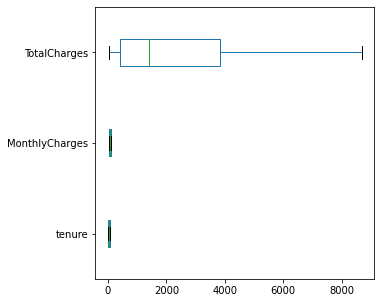

In [ ]:
# check outlier using boxplot
data_1.boxplot(column=['tenure', 'MonthlyCharges', 'TotalCharges'],fontsize=10,rot=0,grid=False,figsize=(5,5),vert=False)

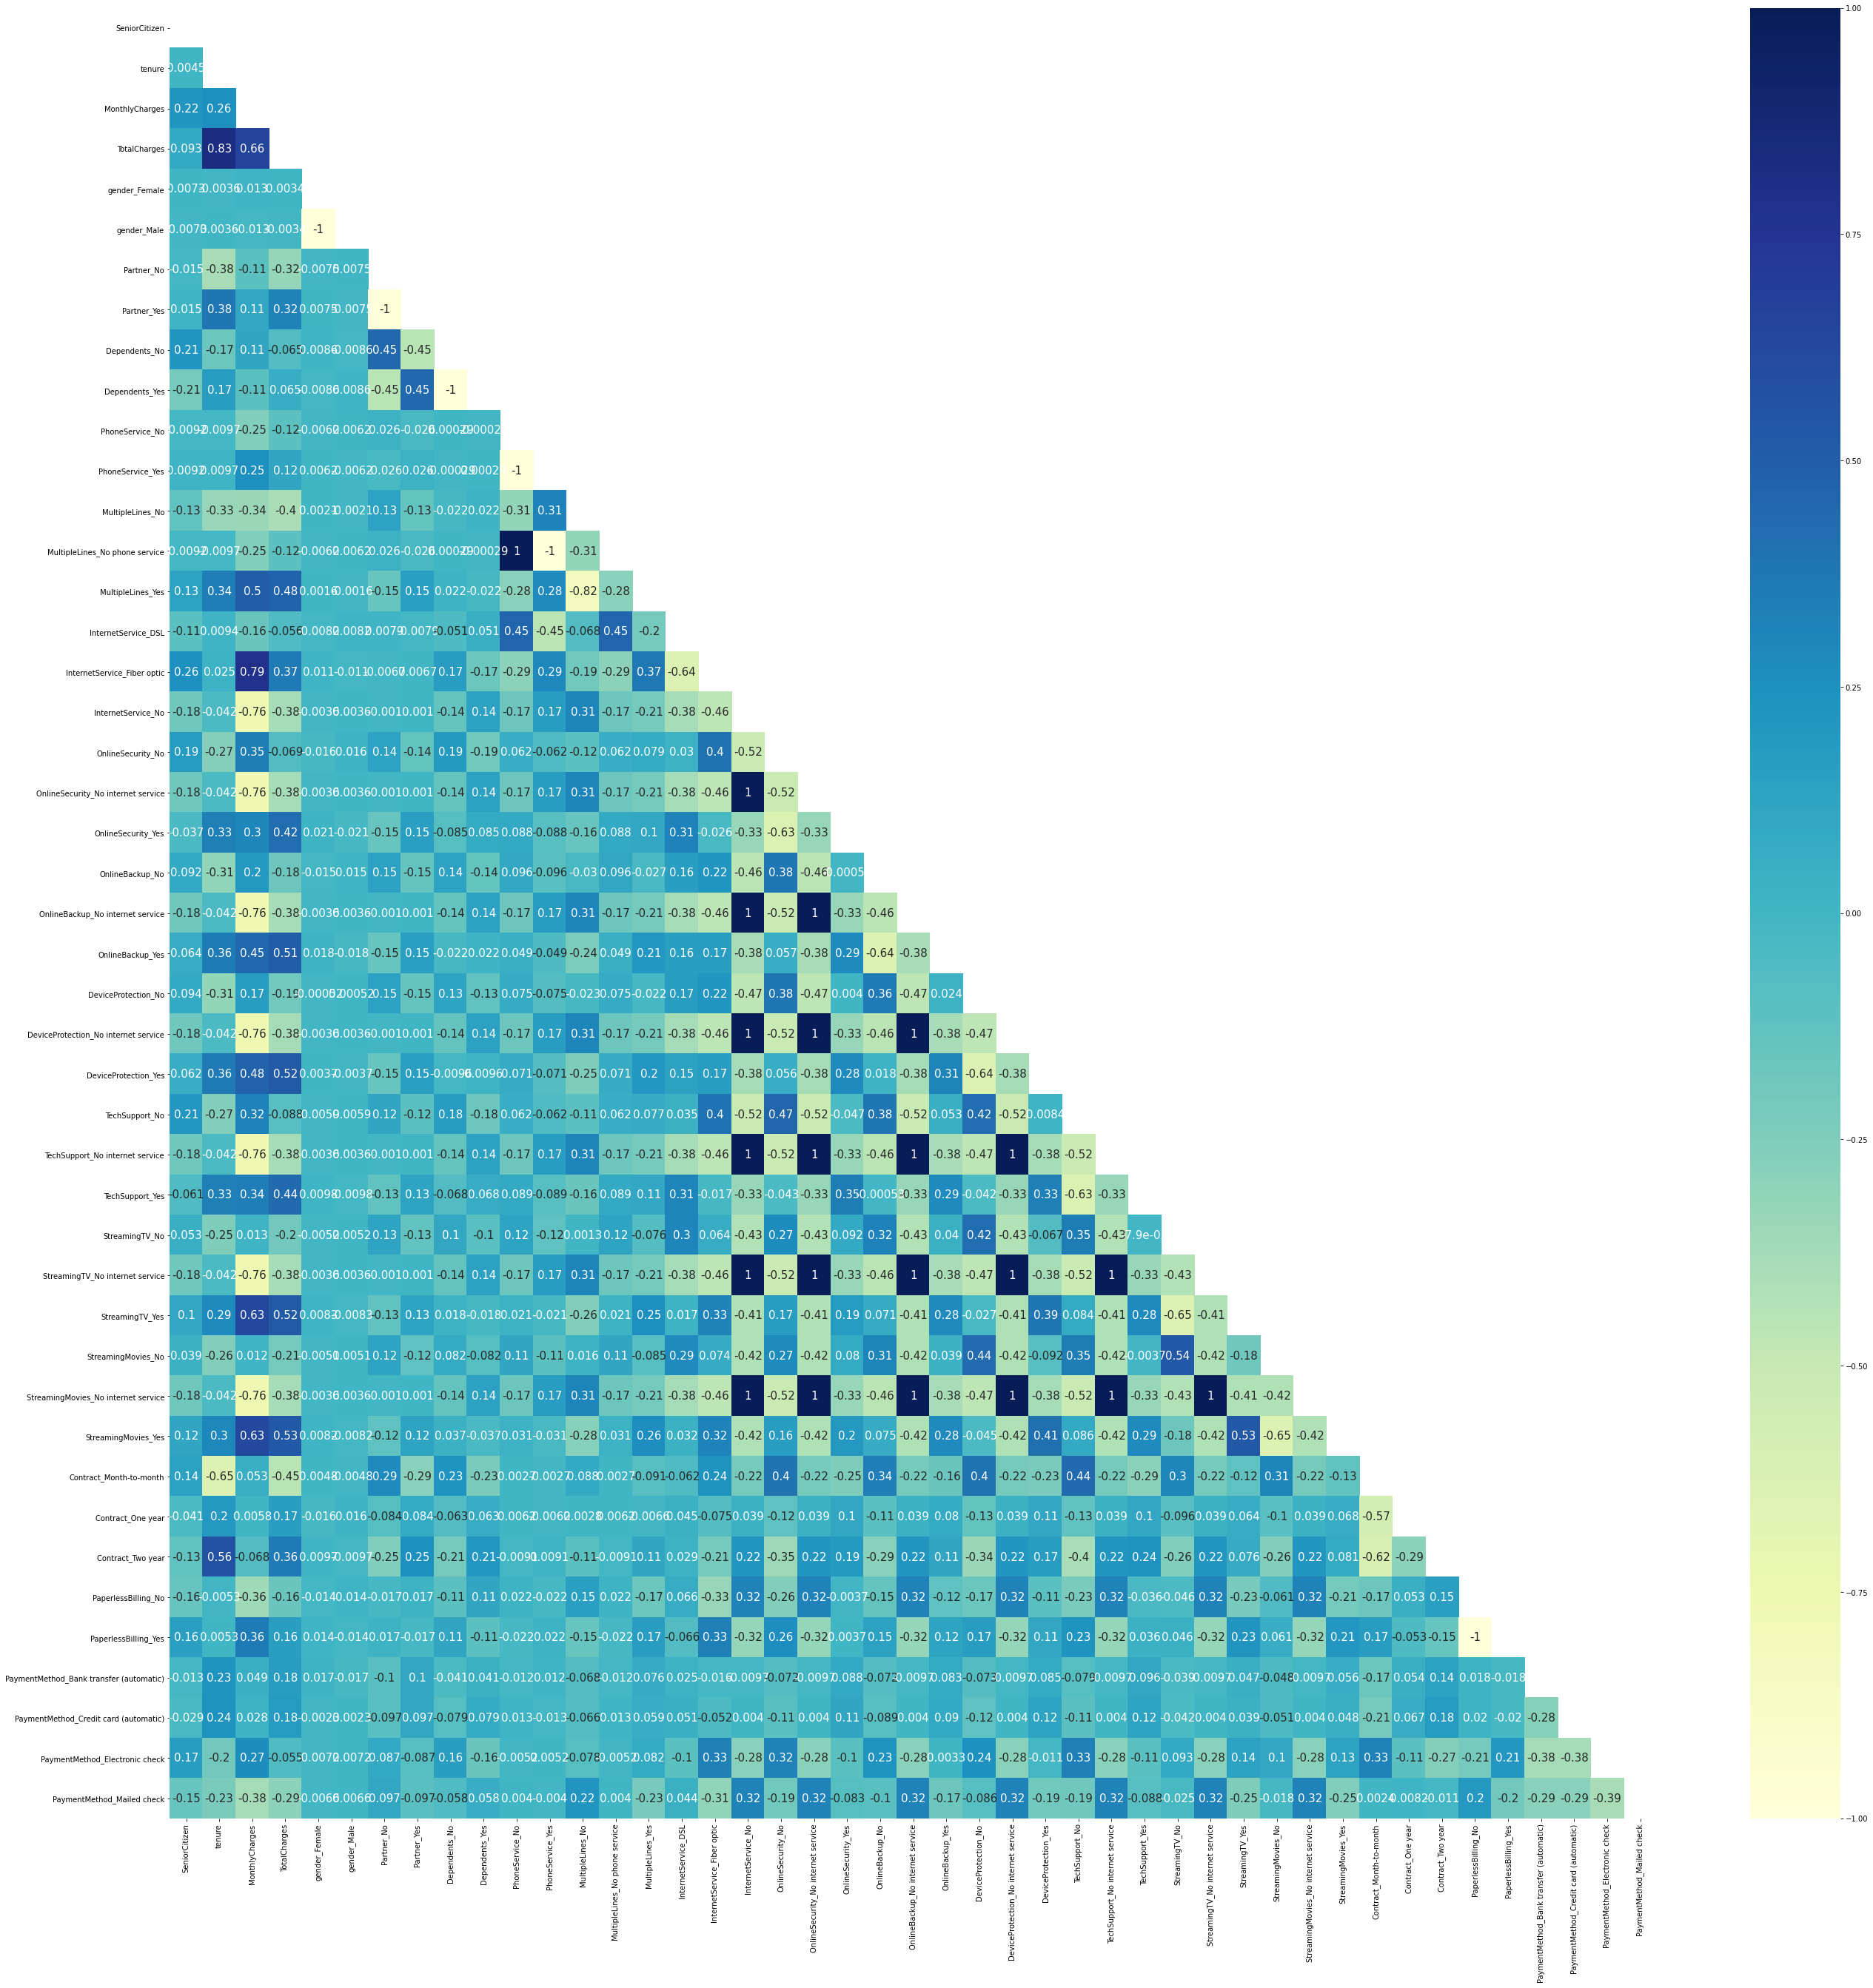

In [ ]:
import numpy as np

# check correlation between feature column

correlation_between_column = data_1.drop(['Churn'], axis=1).corr()
upper_triangle_corr = np.triu(correlation_between_column)

fig, ax = plt.subplots(figsize=(45,45))
sns.heatmap(correlation_between_column, annot = True, cmap="YlGnBu",ax=ax,annot_kws={"size":15},mask=upper_triangle_corr)

Source for high correlation values
https://link.springer.com/article/10.1057/jt.2009.5

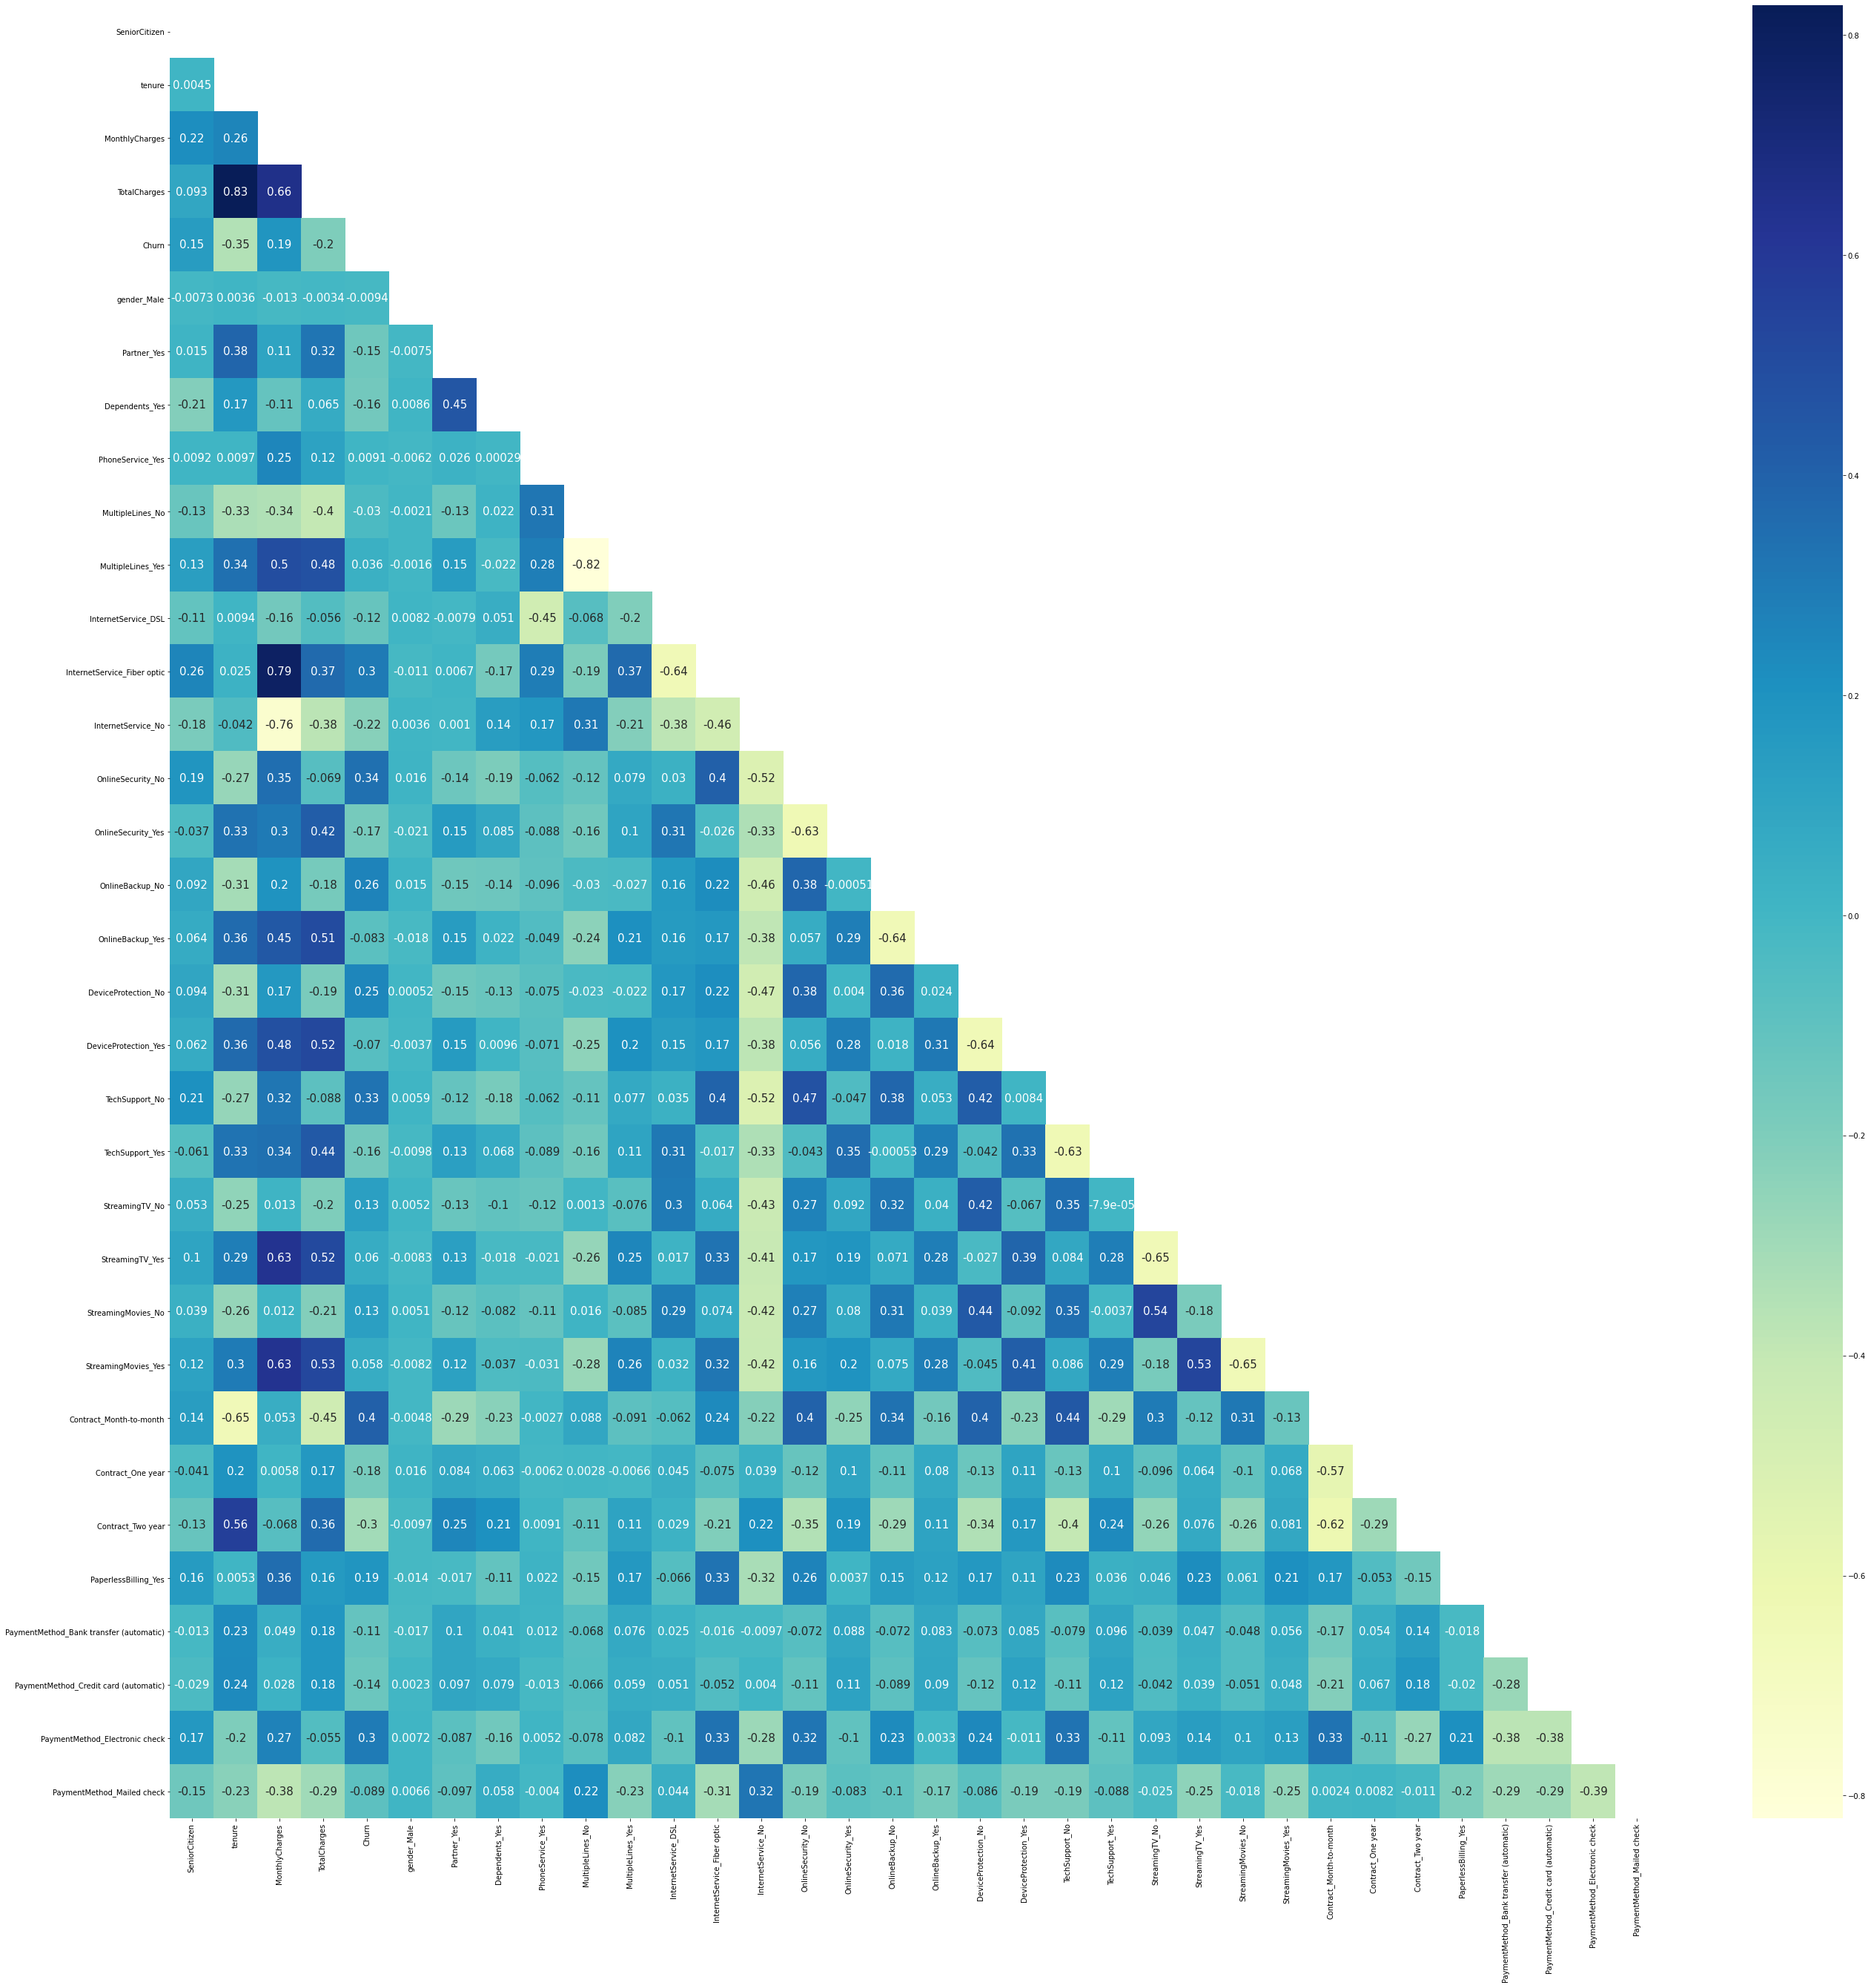

In [ ]:
# remove some features that cause high correlation values
data_11 = data_1.drop(['gender_Female','Partner_No','Dependents_No','PhoneService_No','PaperlessBilling_No','MultipleLines_No phone service',
                       'OnlineSecurity_No internet service','OnlineBackup_No internet service','DeviceProtection_No internet service',
                       'TechSupport_No internet service','StreamingTV_No internet service','StreamingMovies_No internet service'], axis=1)

correlation_between_column = data_11.corr()
upper_triangle_corr = np.triu(correlation_between_column)

fig, ax = plt.subplots(figsize=(45,45))
sns.heatmap(correlation_between_column, annot = True, cmap="YlGnBu",ax=ax,annot_kws={"size":15},mask=upper_triangle_corr)

In [ ]:
#Get Correlation of "Churn" with other variables:
data_11.corr()['Churn'].sort_values(ascending = False)

Churn                                      1.000000
Contract_Month-to-month                    0.403332
OnlineSecurity_No                          0.341085
TechSupport_No                             0.330572
InternetService_Fiber optic                0.300297
PaymentMethod_Electronic check             0.296304
OnlineBackup_No                            0.264757
DeviceProtection_No                        0.251938
PaperlessBilling_Yes                       0.188653
MonthlyCharges                             0.186122
SeniorCitizen                              0.149726
StreamingMovies_No                         0.129615
StreamingTV_No                             0.127512
StreamingTV_Yes                            0.060267
StreamingMovies_Yes                        0.058320
MultipleLines_Yes                          0.036125
PhoneService_Yes                           0.009097
gender_Male                               -0.009377
MultipleLines_No                          -0.030343
DeviceProtec

In [ ]:
# remove some features that cause high correlation values
data_ok = data_11.drop(['TotalCharges','MonthlyCharges'], axis=1)
data_ok.head()

,SeniorCitizen,tenure,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,72,0,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,0,44,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0,0
2,1,38,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0
3,0,4,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0
4,0,2,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0


In [ ]:
data_ok.shape

(5976, 32)

# Preparation for Modeling

In [ ]:
feature_tenure = ['tenure']
df_feature_tenure = pd.DataFrame(data_ok, columns=feature_tenure)
df_remaining = data_ok.drop(columns=feature_tenure)

In [ ]:
from sklearn.preprocessing import StandardScaler
scX = StandardScaler()

In [ ]:
# scaling column tenure
rescaled_features = scX.fit_transform(df_feature_tenure)
df_rescaled_feature = pd.DataFrame(rescaled_features, columns=feature_tenure, index = df_remaining.index )
data_ok = pd.concat([df_remaining,df_rescaled_feature], axis=1)

In [ ]:
data_ok.head()

,SeniorCitizen,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure
0,0,0,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1.611381
1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0.468468
2,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0.223558
3,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,-1.164265
4,0,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,-1.245901


In [ ]:
# determine training data and test data
X = data_ok.drop(['Churn'], axis=1)
y = data_ok['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


In [ ]:
# solution for imbalance 
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'),y_train)

from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({0: 3505, 1: 1275})
After SMOTE : Counter({0: 3505, 1: 3505})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# Modeling and Evaluation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

### KNN

In [ ]:
knn_1 = KNeighborsClassifier()
knn_1.fit( X_train_smote, y_train_smote )
pred_knn_1 = knn_1.predict( X_test )
y_train_pred_knn_1 = knn_1.predict(X_train_smote)

# the accuracy of this model in the Test set
print('Accuracy Train Data:',accuracy_score(y_train_smote,y_train_pred_knn_1))
print('Accuracy Test Data:',accuracy_score(y_test,pred_knn_1))
print('Recall Train Data:',recall_score(y_train_smote,y_train_pred_knn_1))
print('Recall Test Data:',recall_score(y_test,pred_knn_1))

# confusing matrix
pd.crosstab(y_test,pred_knn_1)

Accuracy Train Data: 0.8599144079885878
Accuracy Test Data: 0.7023411371237458
Recall Train Data: 0.9600570613409415
Recall Test Data: 0.7692307692307693


col_0,0,1
Churn,,
0,600,284
1,72,240


In [ ]:
# displays a report containing the accuracy of the model in the Test set
print(classification_report(y_test, pred_knn_1))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77       884
           1       0.46      0.77      0.57       312

    accuracy                           0.70      1196
   macro avg       0.68      0.72      0.67      1196
weighted avg       0.78      0.70      0.72      1196



### Logistic Regression

In [ ]:
logreg_1 = LogisticRegression()
logreg_1.fit( X_train_smote, y_train_smote )
pred_logreg_1 = logreg_1.predict( X_test )
y_train_pred_logreg_1 = logreg_1.predict(X_train_smote)

# the accuracy of this model in the Test set
print('Accuracy Train Data:',accuracy_score(y_train_smote,y_train_pred_logreg_1))
print('Accuracy Test Data:',accuracy_score(y_test,pred_logreg_1))
print('Recall Train Data:',recall_score(y_train_smote,y_train_pred_logreg_1))
print('Recall Test Data:',recall_score(y_test,pred_logreg_1))

# confusion matrix
pd.crosstab(y_test,pred_logreg_1)

Accuracy Train Data: 0.7706134094151212
Accuracy Test Data: 0.745819397993311
Recall Train Data: 0.7948644793152639
Recall Test Data: 0.8012820512820513


col_0,0,1
Churn,,
0,642,242
1,62,250


In [ ]:
# displays a report containing the accuracy of the model in the Test set
print(classification_report(y_test, pred_logreg_1))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81       884
           1       0.51      0.80      0.62       312

    accuracy                           0.75      1196
   macro avg       0.71      0.76      0.72      1196
weighted avg       0.81      0.75      0.76      1196



### Random Forest

In [ ]:
model_rf_1 = RandomForestClassifier()
model_rf_1.fit(X_train_smote, y_train_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred_rf_1 = model_rf_1.predict( X_test )
y_train_pred_rf_1 = model_rf_1.predict(X_train_smote)

# the accuracy of this model in the Test set
print('Accuracy Train Data:',accuracy_score(y_train_smote,y_train_pred_rf_1))
print('Accuracy Test Data:',accuracy_score(y_test,pred_rf_1))
print('Recall Train Data:',recall_score(y_train_smote,y_train_pred_rf_1))
print('Recall Test Data:',recall_score(y_test,pred_rf_1))

# confusion matrix
pd.crosstab(y_test,pred_rf_1)

Accuracy Train Data: 0.985021398002853
Accuracy Test Data: 0.782608695652174
Recall Train Data: 0.9914407988587732
Recall Test Data: 0.5769230769230769


col_0,0,1
Churn,,
0,756,128
1,132,180


In [ ]:
# displays a report containing the accuracy of the model in the Test set
print(classification_report(y_test, pred_rf_1))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       884
           1       0.58      0.58      0.58       312

    accuracy                           0.78      1196
   macro avg       0.72      0.72      0.72      1196
weighted avg       0.78      0.78      0.78      1196



### SVM

In [ ]:
model_svc_1 = SVC()
model_svc_1.fit(X_train_smote, y_train_smote)
pred_model_svc_1 = model_svc_1.predict(X_test)
y_train_pred_svc_1 = model_svc_1.predict(X_train_smote)

# the accuracy of this model in the Test set
print('Accuracy Train Data:',accuracy_score(y_train_smote,y_train_pred_svc_1))
print('Accuracy Test Data:',accuracy_score(y_test,pred_model_svc_1))
print('Recall Train Data:',recall_score(y_train_smote,y_train_pred_svc_1))
print('Recall Test Data:',recall_score(y_test,pred_model_svc_1))

# confusing matrix
pd.crosstab(y_test,pred_model_svc_1)

Accuracy Train Data: 0.8417974322396576
Accuracy Test Data: 0.7466555183946488
Recall Train Data: 0.8864479315263909
Recall Test Data: 0.7532051282051282


col_0,0,1
Churn,,
0,658,226
1,77,235


In [ ]:
# displays a report containing the accuracy of the model in the Test set
print(classification_report(y_test, pred_model_svc_1))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81       884
           1       0.51      0.75      0.61       312

    accuracy                           0.75      1196
   macro avg       0.70      0.75      0.71      1196
weighted avg       0.79      0.75      0.76      1196



### AdaBoost

In [ ]:
# AdaBoost Algorithm
AB_1 = AdaBoostClassifier()
AB_1.fit(X_train_smote,y_train_smote)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [ ]:
pred_AB_1 = AB_1.predict( X_test )
y_train_pred_ada_1 = AB_1.predict(X_train_smote)

# the accuracy of this model in the Test set
print('Accuracy Train Data:',accuracy_score(y_train_smote,y_train_pred_ada_1))
print('Accuracy Test Data:',accuracy_score(y_test,pred_AB_1))
print('Recall Train Data:',recall_score(y_train_smote,y_train_pred_ada_1))
print('Recall Test Data:',recall_score(y_test,pred_AB_1))

# confusion matrix
pd.crosstab(y_test,pred_AB_1)

Accuracy Train Data: 0.8218259629101284
Accuracy Test Data: 0.7566889632107023
Recall Train Data: 0.8670470756062767
Recall Test Data: 0.7467948717948718


col_0,0,1
Churn,,
0,672,212
1,79,233


In [ ]:
# displays a report containing the accuracy of the model in the Test set
print(classification_report(y_test, pred_AB_1))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       884
           1       0.52      0.75      0.62       312

    accuracy                           0.76      1196
   macro avg       0.71      0.75      0.72      1196
weighted avg       0.80      0.76      0.77      1196



## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

### KNN

In [ ]:
# determine the best parameters for the KNN model
model = KNeighborsClassifier()
param_grid ={'n_neighbors':np.arange(1,100), 'weights':['uniform','distance']}
gscv = GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=5)
gscv.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jo

In [ ]:
gscv.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1, weights= 'uniform')
knn.fit( X_train_smote, y_train_smote )
pred_knn = knn.predict( X_test )
y_train_pred_knn = knn.predict(X_train_smote)

# the accuracy of this model in the Test set
print('Accuracy Train Data:',accuracy_score(y_train_smote,y_train_pred_knn))
print('Accuracy Test Data:',accuracy_score(y_test,pred_knn))
print('Recall Train Data:',recall_score(y_train_smote,y_train_pred_knn))
print('Recall Test Data:',recall_score(y_test,pred_knn))

# confusing matrix
pd.crosstab(y_test,pred_knn)

Accuracy Train Data: 0.9828815977175464
Accuracy Test Data: 0.7006688963210702
Recall Train Data: 0.9817403708987161
Recall Test Data: 0.5544871794871795


col_0,0,1
Churn,,
0,665,219
1,139,173


In [ ]:
# displays a report containing the accuracy of the model in the Test set
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       884
           1       0.44      0.55      0.49       312

    accuracy                           0.70      1196
   macro avg       0.63      0.65      0.64      1196
weighted avg       0.73      0.70      0.71      1196



### Logistic Regression

In [ ]:
# determine the best parameters for the Logistic Regression model
model = LogisticRegression()
param_grid ={'C':np.arange(1, 5, .01), 'penalty':['l1', 'l2', 'elasticnet']}
gscv = GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=5)
gscv.fit(X_train_smote, y_train_smote)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.  , 1.01, 1.02, 1.03,...
       4.52, 4.53, 4.54, 4.55, 4.56, 4.57, 4.58, 4.59, 4.6 , 4.61, 4.62,
       4.63, 4.64, 4.65, 4.66, 4.67, 4.68, 4.69, 4.7 , 4.71, 4.72, 4.73,
       4.74, 4.75, 4.76, 4.77, 4.78, 4.79, 4.8 , 4.81, 4.82, 4.83, 4.84,
       4.85, 4.86, 4.87, 4.88, 4.89, 4.9 , 4.91, 4.92, 4.93, 4.94, 4.

In [ ]:
gscv.best_params_

{'C': 1.01, 'penalty': 'l2'}

In [ ]:
logreg = LogisticRegression(C= 1.01, penalty = 'l2')
logreg.fit( X_train_smote, y_train_smote )
pred_logreg = logreg.predict( X_test )
y_train_pred_logreg = logreg.predict(X_train_smote)

# the accuracy of this model in the Test set
print('Accuracy Train Data:',accuracy_score(y_train_smote,y_train_pred_logreg))
print('Accuracy Test Data:',accuracy_score(y_test,pred_logreg))
print('Recall Train Data:',recall_score(y_train_smote,y_train_pred_logreg))
print('Recall Test Data:',recall_score(y_test,pred_logreg))

# confusion matrix
pd.crosstab(y_test,pred_logreg)

Accuracy Train Data: 0.7706134094151212
Accuracy Test Data: 0.745819397993311
Recall Train Data: 0.7948644793152639
Recall Test Data: 0.8012820512820513


col_0,0,1
Churn,,
0,642,242
1,62,250


In [ ]:
# displays a report containing the accuracy of the model in the Test set
print(classification_report(y_test, pred_logreg))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81       884
           1       0.51      0.80      0.62       312

    accuracy                           0.75      1196
   macro avg       0.71      0.76      0.72      1196
weighted avg       0.81      0.75      0.76      1196



### Random Forest

In [ ]:
# determine the best parameters for the random forest model
model = RandomForestClassifier()
param_grid ={'n_estimators':np.arange(1300, 1400, 10),
             'max_features':['auto','sqrt'],
             'max_depth':np.arange(50,71,10),
             'criterion':['gini','entropy'],
             'bootstrap':[True, False]}
gscv = GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=5)
gscv.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

In [ ]:
gscv.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 60,
 'max_features': 'auto',
 'n_estimators': 1300}

In [ ]:
model_rf = RandomForestClassifier(n_estimators=1300, max_features = "auto",
                                  max_depth = 60, criterion = 'entropy', bootstrap=True)
model_rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=60, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred_rf = model_rf.predict( X_test )
y_train_pred_rf = model_rf.predict(X_train_smote)

# the accuracy of this model in the Test set
print('Accuracy Train Data:',accuracy_score(y_train_smote,y_train_pred_rf))
print('Accuracy Test Data:',accuracy_score(y_test,pred_rf))
print('Recall Train Data:',recall_score(y_train_smote,y_train_pred_rf))
print('Recall Test Data:',recall_score(y_test,pred_rf))

# confusion matrix
pd.crosstab(y_test,pred_rf)

Accuracy Train Data: 0.985021398002853
Accuracy Test Data: 0.7834448160535117
Recall Train Data: 0.9920114122681883
Recall Test Data: 0.5801282051282052


col_0,0,1
Churn,,
0,756,128
1,131,181


In [ ]:
# displays a report containing the accuracy of the model in the Test set
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       884
           1       0.59      0.58      0.58       312

    accuracy                           0.78      1196
   macro avg       0.72      0.72      0.72      1196
weighted avg       0.78      0.78      0.78      1196



### SVM

In [ ]:
# Determine the best parameters for SVM models

param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.01,0.1,0.8,0.9,1,1.1,1.2,1.3]
}

svc = SVC()
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [ ]:
grid_svc.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.01, 0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
# best parameter
grid_svc.best_params_

{'C': 1.4, 'gamma': 1.2, 'kernel': 'rbf'}

In [ ]:
# make model with the best parameter
model_svc = SVC(C = 1.4, gamma =  1.2, kernel= 'rbf')
model_svc.fit(X_train_smote, y_train_smote)
pred_model_svc = model_svc.predict(X_test)
y_train_pred_svc = model_svc.predict(X_train_smote)
# the accuracy of this model in the Test set
print('Accuracy Train Data:',accuracy_score(y_train_smote,y_train_pred_svc))
print('Accuracy Test Data:',accuracy_score(y_test,pred_model_svc))
print('Recall Train Data:',recall_score(y_train_smote,y_train_pred_svc))
print('Recall Test Data:',recall_score(y_test,pred_model_svc))

# confusing matrix
pd.crosstab(y_test,pred_model_svc)

Accuracy Train Data: 0.9527817403708987
Accuracy Test Data: 0.7516722408026756
Recall Train Data: 0.9880171184022825
Recall Test Data: 0.44551282051282054


col_0,0,1
Churn,,
0,760,124
1,173,139


In [ ]:
# displays a report containing the accuracy of the model in the Test set
print(classification_report(y_test, pred_model_svc))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       884
           1       0.53      0.45      0.48       312

    accuracy                           0.75      1196
   macro avg       0.67      0.65      0.66      1196
weighted avg       0.74      0.75      0.74      1196



### AdaBoost

In [ ]:
# Determine the best parameters for AdaBoost models

param = {'n_estimators':np.arange(50, 100, 5),
             'learning_rate':np.arange(1, 10),
             'algorithm':['SAMME','SAMME.R']}

AB = AdaBoostClassifier()
grid_AB = GridSearchCV(AB, param_grid=param, scoring='accuracy', cv=10)

In [ ]:
grid_AB.fit(X_train_smote, y_train_smote)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_weight_boosting.py:604: RuntimeWarning: overflow encountered in exp
  (sample_weight > 0))
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_weight_boosting.py:163: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_weight_boosting.py:604: RuntimeWarning: overflow encountered in exp
  (sample_weight > 0))
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_weight_boosting.py:163: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sam

GridSearchCV(cv=10, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([50, 55, 60, 65, 70, 75, 80, 85, 90, 95])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
# best parameter
grid_AB.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 90}

In [ ]:
# AdaBoost Algorithm
AB = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=1, n_estimators=90)
AB.fit(X_train_smote,y_train_smote)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=90, random_state=None)

In [ ]:
pred_AB = AB.predict( X_test )
y_train_pred_ada = AB.predict(X_train_smote)

# the accuracy of this model in the Test set
print('Accuracy Train Data:',accuracy_score(y_train_smote,y_train_pred_ada))
print('Accuracy Test Data:',accuracy_score(y_test,pred_AB))
print('Recall Train Data:',recall_score(y_train_smote,y_train_pred_ada))
print('Recall Test Data:',recall_score(y_test,pred_AB))

# confusion matrix
pd.crosstab(y_test,pred_AB)

Accuracy Train Data: 0.8300998573466476
Accuracy Test Data: 0.770066889632107
Recall Train Data: 0.8567760342368046
Recall Test Data: 0.7275641025641025


col_0,0,1
Churn,,
0,694,190
1,85,227


In [ ]:
# displays a report containing the accuracy of the model in the Test set
print(classification_report(y_test, pred_AB))

              precision    recall  f1-score   support

           0       0.89      0.79      0.83       884
           1       0.54      0.73      0.62       312

    accuracy                           0.77      1196
   macro avg       0.72      0.76      0.73      1196
weighted avg       0.80      0.77      0.78      1196



In [ ]:
predictions = {'pred_knn_1':pred_knn_1, 'pred_logreg_1':pred_logreg_1, 'pred_rf_1':pred_rf_1, 'pred_model_svc_1':pred_model_svc_1, 'pred_AB_1':pred_AB_1, 
               'pred_knn':pred_knn, 'pred_logreg':pred_logreg, 'pred_rf':pred_rf, 'pred_model_svc':pred_model_svc, 'pred_AB':pred_AB}

print('roc-auc score')
print('-'*50)
for j,k in predictions.items():
  print(j, ':', roc_auc_score(y_test,k))

roc-auc score
--------------------------------------------------
pred_knn_1 : 0.7239819004524888
pred_logreg_1 : 0.7637631975867271
pred_rf_1 : 0.7160633484162895
pred_model_svc_1 : 0.7487745098039216
pred_AB_1 : 0.7534879336349924
pred_knn : 0.6533748114630469
pred_logreg : 0.7637631975867271
pred_rf : 0.7176659125188538
pred_model_svc : 0.6526206636500754
pred_AB : 0.756315987933635


pred_knn_1 : 0.7239819004524888
pred_logreg_1 : 0.7637631975867271
pred_rf_1 : 0.7160633484162895
pred_model_svc_1 : 0.7487745098039216
pred_AB_1 : 0.7534879336349924
pred_knn : 0.6533748114630469
pred_logreg : 0.7637631975867271
pred_rf : 0.7176659125188538
pred_model_svc : 0.6526206636500754
pred_AB : 0.756315987933635


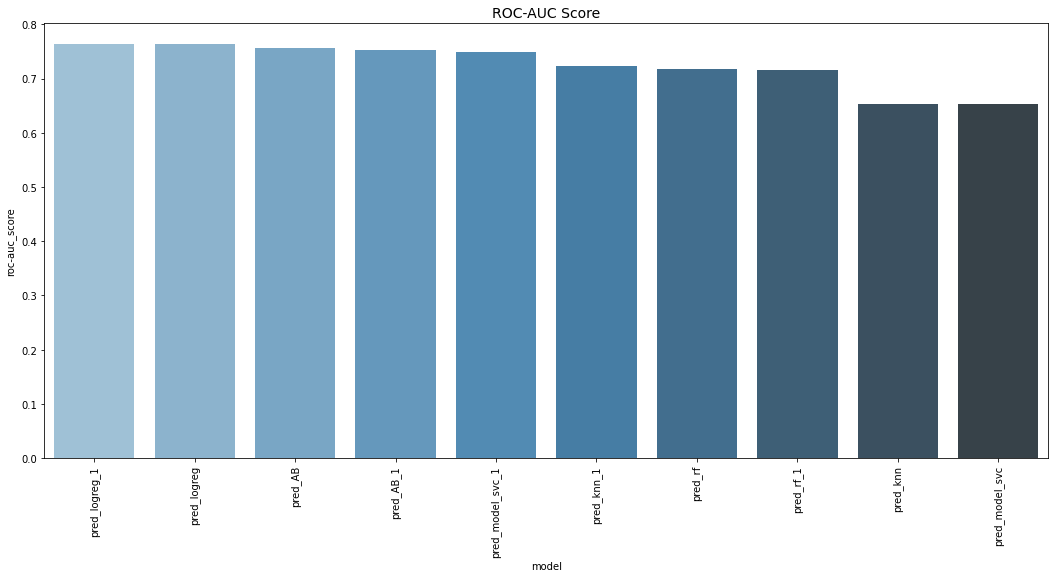

In [ ]:
a = []
b = []
for j,k in predictions.items():
  a.append(j)
  b.append(roc_auc_score(y_test,k))
  print(j, ':', roc_auc_score(y_test,k))
score = pd.DataFrame({'model':a, 'roc-auc_score':b})
score = score.sort_values(by='roc-auc_score',ascending=False)
plt.figure(figsize = (18,8))
plt.title('ROC-AUC Score',fontsize=14)
s = sns.barplot(x='model', y='roc-auc_score', data=score, palette="Blues_d")
s.set_xticklabels(s.get_xticklabels(),rotation=90)

plt.show()


Based on the evaluation, on this topic the logistic regression model is more suitable than the others due to the highest roc-auc value compared to others and the difference in accuracy and recall values of train data and small test data.

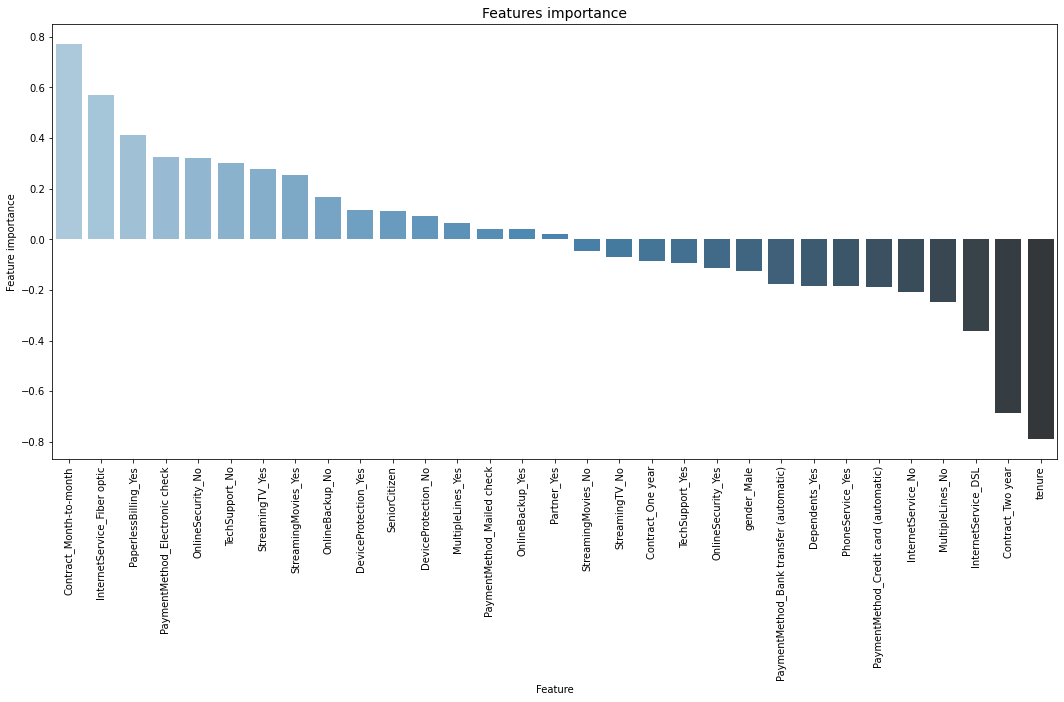

In [ ]:
# Showing important features of logistic regression model
feature_importance = pd.DataFrame({'Feature': data_ok.drop(['Churn'],axis=1).columns, 'Feature importance': logreg.coef_[0]})
feature_importance = feature_importance.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (18,8))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=feature_importance, palette="Blues_d")
s.set_xticklabels(s.get_xticklabels(),rotation=90)

plt.show()

# Recommendation simulation

In [ ]:
X_output = X_test.reset_index()
X_output = X_output.drop(['index'], axis=1)
X_output.head() 

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure
0,1,1,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,-0.225443
1,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,-1.164265
2,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,-1.041810
3,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1.570562
4,1,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0.631741


In [ ]:
y_predict_logreg= pd.DataFrame(pred_logreg)
y_predict_logreg.columns = ['Churn']
y_predict_logreg.head()

,Churn
0,1
1,1
2,1
3,0
4,1


In [ ]:
data_predict = pd.concat([X_output,y_predict_logreg], axis=1)
data_predict.head()

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,Churn
0,1,1,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,-0.225443,1
1,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,-1.164265,1
2,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,-1.041810,1
3,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1.570562,0
4,1,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0.631741,1


In [ ]:
data_churn = data_predict[data_predict['Churn']==1]
data_churn = data_churn.drop(['Churn'], axis=1)
data_churn.shape

(492, 31)

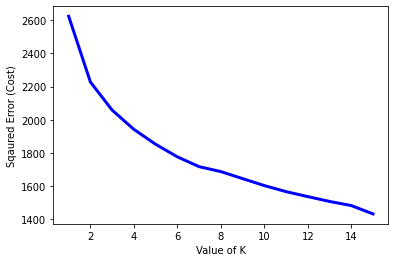

In [ ]:
from sklearn.cluster import KMeans
# Elbow method
cost =[]
for i in range(1, 16):
    KM = KMeans(n_clusters = i, max_iter = 1000)
    KM.fit(data_churn)
      
    # calculates squared error
    # for the clustered points
    cost.append(KM.inertia_)     
  
# plot the cost against K values
plt.plot(range(1, 16), cost, color ='b', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Sqaured Error (Cost)")
plt.show()

The optimal k value in the elbow method is 2

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


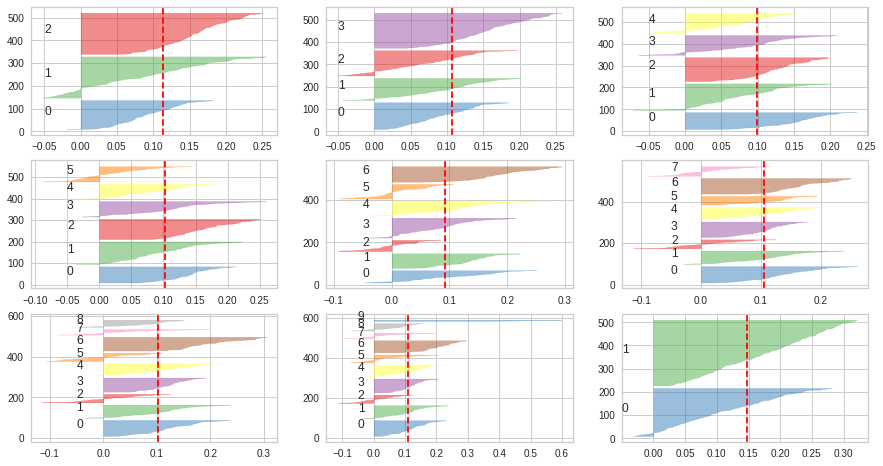

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 3, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 3)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_churn)

the optimal k value in the silhouette method is 2

In [ ]:
import sklearn.metrics as metrics
for i in range(2,11):
    labels=KMeans(n_clusters=i,init="k-means++",random_state=42).fit(data_churn).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(data_churn,labels,metric="euclidean",sample_size=1000,random_state=42)))

Silhouette score for k(clusters) = 2 is 0.14831733816485562
Silhouette score for k(clusters) = 3 is 0.11287082287008862
Silhouette score for k(clusters) = 4 is 0.10771747983568492
Silhouette score for k(clusters) = 5 is 0.09907630700429353
Silhouette score for k(clusters) = 6 is 0.10324530744491504
Silhouette score for k(clusters) = 7 is 0.09303347873200857
Silhouette score for k(clusters) = 8 is 0.1053724978948098
Silhouette score for k(clusters) = 9 is 0.10170854633499793
Silhouette score for k(clusters) = 10 is 0.10818433054571396


In [ ]:
clusterNum = 2
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(data_churn)
labels = k_means.labels_
print(labels)

[0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1
 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1
 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1
 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0
 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0
 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1
 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1
 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0
 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1
 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0
 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 1 1 0]


In [ ]:
data_churn["Clus_km"] = labels
data_churn.head(5)

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,Clus_km
0,1,1,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,-0.225443,0
1,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,-1.164265,0
2,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,-1.041810,0
4,1,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0.631741,1
6,1,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,-1.245901,0


In [ ]:
# check the centroid values by averaging the features in each cluster.
data_churn.groupby('Clus_km').mean()

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure
Clus_km,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.207018,0.452632,0.224561,0.129825,0.85614,0.578947,0.277193,0.400000,0.578947,0.021053,0.880702,0.098246,0.778947,0.200000,0.831579,0.147368,0.898246,0.080702,0.803509,0.175439,0.845614,0.133333,0.996491,0.003509,0.000000,0.708772,0.119298,0.119298,0.533333,0.228070,-0.968766
1,0.318841,0.512077,0.483092,0.173913,0.94686,0.265700,0.681159,0.086957,0.908213,0.004831,0.816425,0.178744,0.507246,0.487923,0.526570,0.468599,0.777778,0.217391,0.198068,0.797101,0.207729,0.787440,0.946860,0.048309,0.004831,0.859903,0.120773,0.120773,0.734300,0.024155,-0.161554


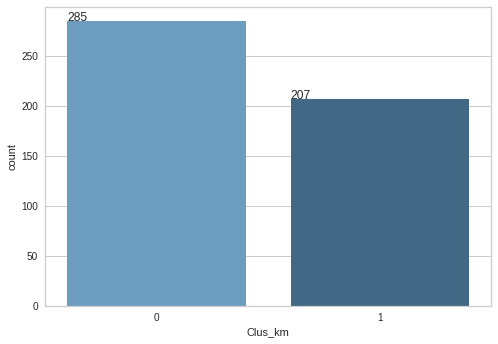

In [ ]:
ax=sns.countplot(x='Clus_km', data=data_churn, palette="Blues_d")
for p in ax.patches:
  ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

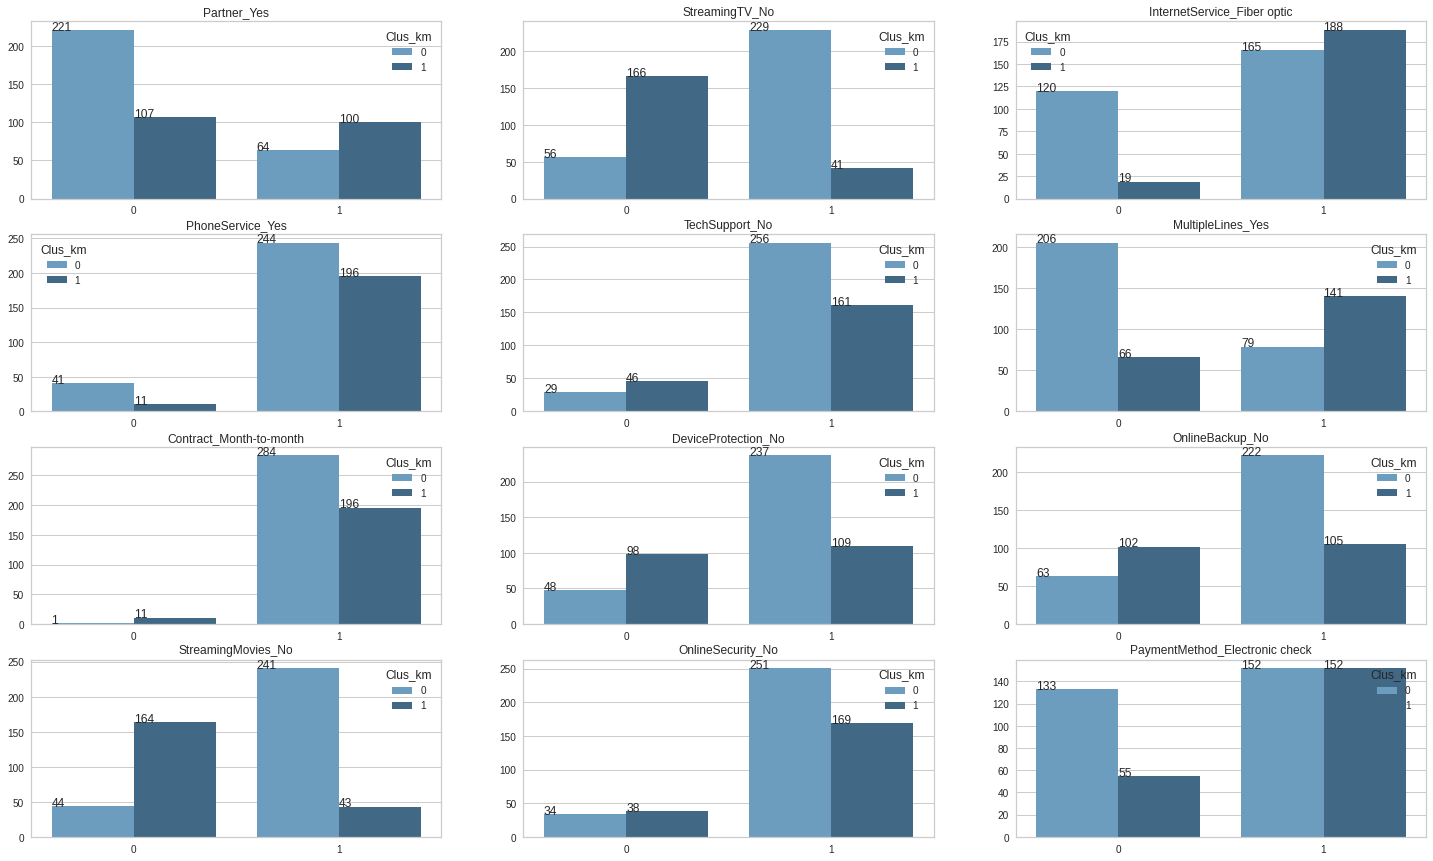

In [ ]:
# Plot Features

def plot_chart(cols,fz=(25,15), rot=0):
    fig, axes = plt.subplots(nrows=4, ncols=(len(cols)+1)//4, figsize=fz)
    for i, col in enumerate(cols):
        ax=sns.countplot(x=col, data=data_churn, hue='Clus_km', ax=axes[i%4,i//4], palette="Blues_d")
        axes[i%4,i//4].set_title(col)
        axes[i%4,i//4].set_xlabel(None)
        axes[i%4,i//4].set_ylabel(None)
        xlabels = axes[i%4,i//4].get_xticklabels()
        for p in ax.patches:
          ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))
 
    for i in range(len(cols), len(axes.flatten()) ):
        fig.delaxes(axes.flatten()[i])

# Plot the first type - accept only Yes/No
plot_chart(['Partner_Yes', 'PhoneService_Yes', 'Contract_Month-to-month','StreamingMovies_No', 'StreamingTV_No', 
            'TechSupport_No', 'DeviceProtection_No', 'OnlineSecurity_No', 'InternetService_Fiber optic', 
            'MultipleLines_Yes', 'OnlineBackup_No', 'PaymentMethod_Electronic check'])

With this model, companies can maximize their efforts to retain consumers. For the example:

Group 1 (1) --> Based on this, some of the discounts that can be applied include:
1. Phone line connected
2. Fiber Optic Internet Service
3. Streaming TV or Movies
4. Payment method credit card
5. Contract non month to month

Group 2 (0) --> Based on this, some of the discounts that can be applied include:
1. Internet Service, Tech Support, Streaming TV or Movies (priority services based on who they are not married to the event based on a special day)
2. Contract non month to month

Budget for each person: 170 dollar (Group 1) and 120 dollar (Group 2)

In [ ]:
print('Total Budget',(207*170)+(285*120))

Total Budget 69390


If without using a model that can predict churn cases, the company will incur different costs. This is because the company has to find new consumers due to the loss of 492 consumers. Here's the explanation.

TV ad cost: 115.000 dollar (30-second) </br>
TV ad production: 2.000 dollar (minimum cost) </br>
Total : 115.000 + 2.000 = 117.000 dollar


source : https://fitsmallbusiness.com/tv-advertising/?__cf_chl_jschl_tk__=3f4219ef67bc450b07bd8df2c4fce5a2af413a14-1623395166-0-ATRf-BRPa7lJl0Jzpsvk6Lri9owL2ki57-xjocfW_SYmLgEZu8sOCane7fEYGGa30hIOh2b6dP4WqojUWWeW2XQy7e6jms5CmtuRdF5Adg0l_uOcjLpKJeKjvUVCrUJL4TcCp9U2KX6LPHf9GYcLmkusaDi78NTX3LmNB2XaMd2My1uOZLpBTuq283fkcDaAXM5Rj13V5dxi8gO5pzJgxoF7Ay8H0oyDPnvHAgZgxbA-nilS9QhsWDO7X8b0NqGHkpsCX8MtziH5H9zFv8TFQdLnkHHXHPJ0YNxS3mrKxJswUc1ekubqIAZCaJPbrr-WOG7GJ5Vf4XAlXkQFOddzVr4mWWFBnNbYxmDLUly62VOaIiLvhTuL0keuo_4ruIKIhWzLpycaFgTEa0p2XonhI1tN2YZU5xNPgrPL_OIhDaHu

By making a model that can predict consumer churn, the company can save 47610 dollar (40,69% of the advertising fee)